In [2]:
#Alessandri Garbi matricola:294523, progetto per Big Data and Buisness Intelligence

#obbiettivo della ricerca: fornire uno strumento per prevedere la quantità di polveri sottili (PM 2.5) 

#strumenti utilizzati: piattaforma dext3r per ottenimento dei dati ambientali, script in python per ottenere
#dati sulla quantità di polveri sottili, algoritmi di machine learning



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from io import StringIO

data=pd.read_csv('dati.csv',engine='python')     #lettura dati sulle polveri sottili
data_cleaned=data.iloc[:,4:6]

data_cleaned.head()

,giorno,PM2.5
0,2,12
1,3,12
2,4,13
3,5,15
4,6,15


In [4]:
wind=pd.read_csv('wind.csv',engine='python',skiprows=3,skipfooter=10)   #lettura dati sull'intensità del vento
wind_cleaned=wind.iloc[:,2:3]
wind_cleaned.head()



,Velocita' media giornaliera scalare del vento a 10 m dal suolo (M/S)
0,1.5
1,1.6
2,1.5
3,1.2
4,1.4


In [5]:
rain=pd.read_csv('rain.csv',engine='python',skiprows=3,skipfooter=10) #lettura dati sull'intensità della pioggia
rain_cleaned = rain.iloc[:,2:3]

rain_cleaned.head()

,Precipitazione cumulata giornaliera (KG/M**2)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [6]:
temperature=pd.read_csv('temperature.csv',engine='python',skiprows=3,skipfooter=10) #lettura dati sull'intensità della pioggia
temperature_cleaned = temperature.iloc[:,2:3]

temperature_cleaned.head()

,Temperatura dell'aria media giornaliera a 2 m dal suolo (°C)
0,22.78
1,23.33
2,24.25
3,24.11
4,24.52


/home/alle/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alle/.local/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/alle/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alle/.local/lib/python3.8/site-packages/s

Text(0.5, 0.98, 'data collection')

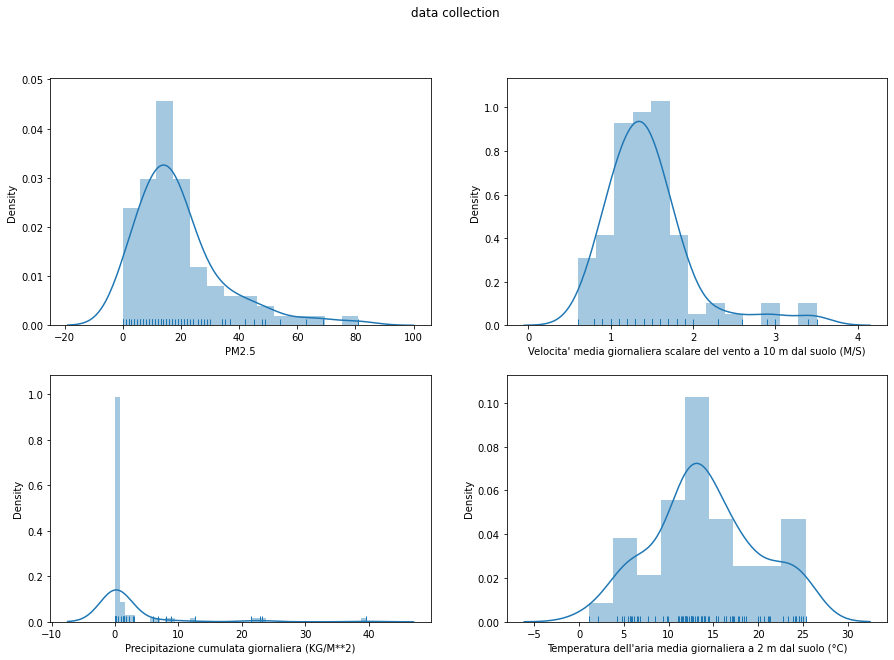

In [7]:
fig = plt.figure(1,figsize=(15,10))



plt.subplot(221)
sns.distplot(data_cleaned.iloc[:,1:2]["PM2.5"], rug=True)

plt.subplot(222)
sns.distplot(wind_cleaned["Velocita' media giornaliera scalare del vento a 10 m dal suolo (M/S)"], rug=True)

plt.subplot(223)
sns.distplot(rain_cleaned["Precipitazione cumulata giornaliera (KG/M**2)"], rug=True)

plt.subplot(224)
sns.distplot(temperature_cleaned["Temperatura dell'aria media giornaliera a 2 m dal suolo (°C)"], rug=True)

plt.suptitle('data collection')


In [8]:
type(data_cleaned)
type(rain_cleaned)
type(wind_cleaned)
type(temperature_cleaned)

pandas.core.frame.DataFrame

In [9]:
final_dataset=data_cleaned.copy()
final_dataset['wind_cleaned']=wind_cleaned
final_dataset['rain_cleaned']=rain_cleaned
final_dataset['temperature_cleaned']=temperature_cleaned
final_dataset.to_csv('final_dataset')

final_dataset.head()

,giorno,PM2.5,wind_cleaned,rain_cleaned,temperature_cleaned
0,2,12,1.5,0.0,22.78
1,3,12,1.6,0.0,23.33
2,4,13,1.5,0.0,24.25
3,5,15,1.2,0.0,24.11
4,6,15,1.4,0.0,24.52


In [10]:
#implementiamo l'algoritmo di ML
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler()
scaled_fd = min_max.fit_transform(final_dataset.values)
final_fd = pd.DataFrame(scaled_fd,columns=["giorno","wind_cleaned","rain_cleaned","temperature_cleaned","PM2.5"])


In [13]:

from sklearn.model_selection import train_test_split
X = final_fd.iloc[:,0:-1] # we only take the first N-1 columns.
y = final_fd['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)


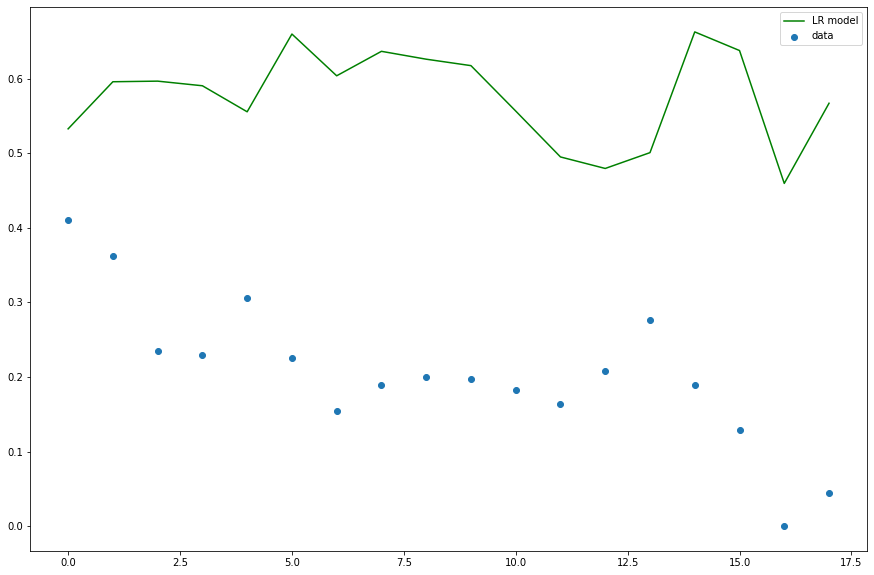

In [14]:
# Linear Regression model
from sklearn.linear_model import LinearRegression 
clf_lr = LinearRegression()
clf_lr.fit(X_train,y_train)
y_pred = clf_lr.predict(X_test)

# Linear Regression
fig2 = plt.figure(1,figsize=(15,10))
plt.scatter(range(len(y_test)),y_test,label='data')
plt.plot(range(len(y_test)),y_pred,color='green',label='LR model')
plt.legend()


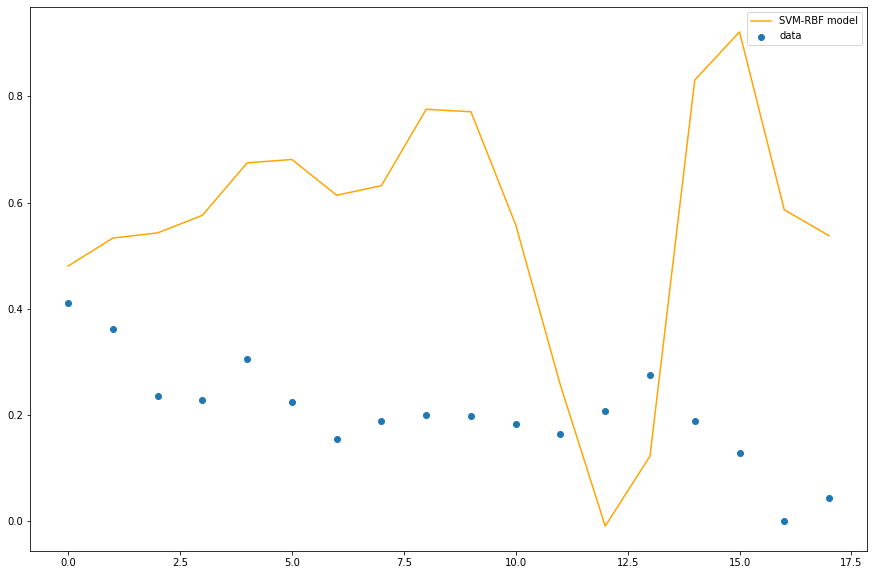

In [15]:
from sklearn.svm import SVR
clf_svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)   #con kernel standard=rbf(radial basis function)
clf_svr_rbf.fit(X_train,y_train)
y_pred_svr = clf_svr_rbf.predict(X_test)

#Support Vector Machine
fig3 = plt.figure(1,figsize=(15,10))
plt.scatter(range(len(y_test)),y_test,label='data')
plt.plot(range(len(y_test)),y_pred_svr,color='orange',label='SVM-RBF model')
plt.legend()

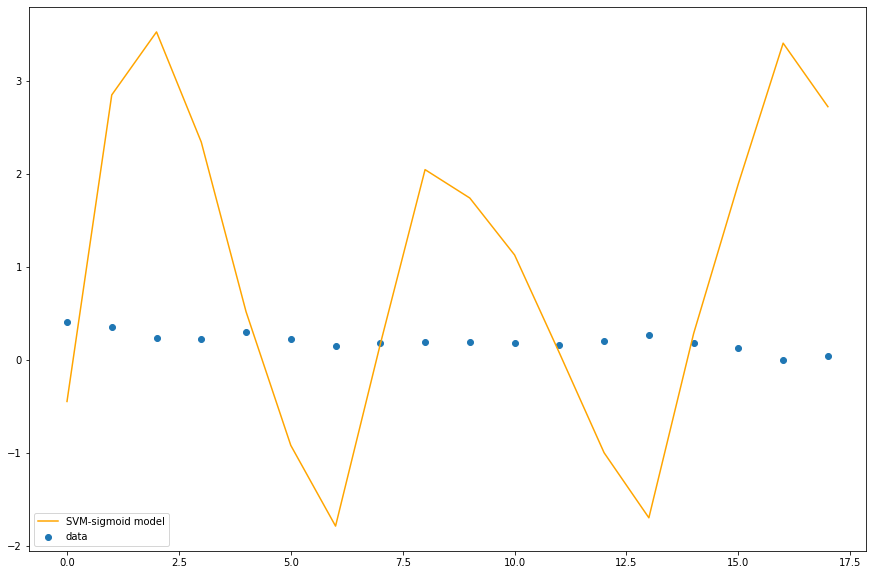

In [16]:
from sklearn.svm import SVR
clf_svr_sig = SVR(kernel='sigmoid')   #con kernel sigmoide
clf_svr_sig.fit(X_train,y_train)
y_pred_svr_sig = clf_svr_sig.predict(X_test)

#Support Vector Machine
fig4 = plt.figure(1,figsize=(15,10))
plt.scatter(range(len(y_test)),y_test,label='data')
plt.plot(range(len(y_test)),y_pred_svr_sig,color='orange',label='SVM-sigmoid model')
plt.legend()

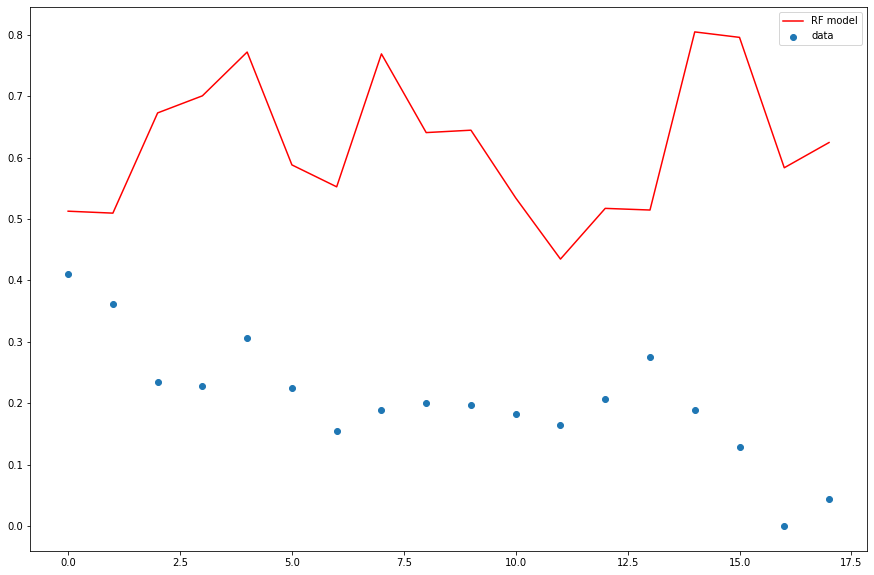

In [17]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)

fig5 = plt.figure(1,figsize=(15,10))
plt.scatter(range(len(y_test)),y_test,label='data')
plt.plot(range(len(y_test)),y_pred_rf,color='red',label='RF model')
plt.legend()

In [19]:
#print("Accuracy of Linear Regerssion Model:",clf_lr.score(X_test,y_test))
#print("Accuracy of SVM-RBF Model:",clf_svr_rbf.score(X_test,y_test))
print("Accuracy of SVM-sigmoid Model:",clf_svr_sig.score(X_test,y_test))
#print("Accuracy of Random Forest Model:",clf_rf.score(X_test,y_test))


Accuracy of SVM-sigmoid Model: -375.7059566981438
